This notebook runs a basic speed test for a simple algorithm that implements the process described in Collatz Conjecture.

https://en.wikipedia.org/wiki/Collatz_conjecture

### Imports

In [0]:
!pip install -U -q tf-nightly

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.contrib import autograph as ag
from tensorflow.python.eager import context

### Plotting helpers

In [0]:
def plot_results(counts, times, title):
  plt.plot(counts, np.array(times) * 1000., 'o')
  plt.ylabel('Time (milliseconds)')
  plt.xlabel('Collatz counter')
  plt.title(title)
  plt.ylim(0, 30)


### Collatz function definition

In [0]:
def collatz(a):
  count = 0
  while a > 1.1:
    if a % 2 < 0.1:
      a //= 2
    else:
      a = 3 * a + 1
    count += 1
  return count


# AutoGraph

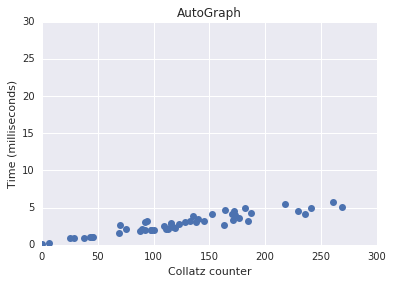

In [5]:
counts = []
times = []
for n in np.logspace(0, 7, 50):

  with tf.Graph().as_default():
    tf_collatz = ag.to_graph(collatz)
    count = tf_collatz(tf.constant(n, dtype=tf.float32))
    with tf.Session() as sess:
      count_value = sess.run(count)

      res = %timeit -n10 -r1 -o -q sess.run(count)
      counts.append(count_value)
      times.append(res.best)
      
plot_results(counts, times, 'AutoGraph')

# Eager

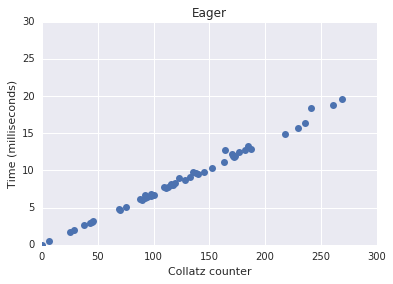

In [6]:
with context.eager_mode():

  counts = []
  times = []  
  for n in np.logspace(0, 7, 50):

    n_tensor = tf.constant(n, dtype=tf.float32)
    count = collatz(n_tensor)

    res = %timeit -n10 -r1 -o -q collatz(n_tensor)
    times.append(res.best)
    counts.append(count)
      
plot_results(counts, times, 'Eager')
